Importing the dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

nyc_bookings = pd.read_csv("/Users/pawanbtw/Downloads/data1.csv")

In [3]:
nyc_bookings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
nyc_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Data cleaning

Casting the Date column as Datatime format

In [5]:
nyc_bookings["last_review"] = pd.to_datetime (nyc_bookings["last_review"])
nyc_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

Checking for Null Values

In [6]:
nyc_bookings.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Handling the missing values: Significant missing values were found in 'name', 'host_name', 'last_review', and 'reviews_per_month'. We replaced missing 'name' and 'host_name' with 'N/A', 'last_review' with 'N/A', and 'reviews_per_month' with -1.

In [7]:
nyc_bookings['name'] = nyc_bookings['name'].fillna('N/A')
nyc_bookings['host_name'] = nyc_bookings['host_name'].fillna('N/A')

In [8]:
nyc_bookings['last_review'] = nyc_bookings['last_review'].fillna('N/A')
nyc_bookings['reviews_per_month'] = nyc_bookings['reviews_per_month'].fillna(-1)

In [9]:
nyc_bookings.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Filtering the NYC bookings dataset to include only the key columns.

In [10]:
nyc_listing_df_focus = (
                        nyc_bookings.loc[:, ['neighbourhood_group', 'neighbourhood',
                        'room_type', 'price', 'minimum_nights', 'number_of_reviews',
                        'last_review', 'reviews_per_month', 'calculated_host_listings_count',
                        'availability_365']]
                        )
nyc_listing_df_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   last_review                     48895 non-null  object 
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.7+ MB


In [11]:
nyc_listing_df_focus.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,0.885327,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.778536,32.952519,131.622289
min,0.000000,1.000000,0.000000,-1.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
nyc_listing_df_focus.query("price == 0").count()

neighbourhood_group               11
neighbourhood                     11
room_type                         11
price                             11
minimum_nights                    11
number_of_reviews                 11
last_review                       11
reviews_per_month                 11
calculated_host_listings_count    11
availability_365                  11
dtype: int64

### There are 11 listings with a price of 0 Dollars, likely due to promotional offers, data entry errors, or special arrangements. These entries should be handled carefully to avoid skewing analysis results.


### We can neglect these 11 listings out of 48,895 entries. They are unlikely to significantly impact overall analysis results.


# Data Analysis
Calculation of Average prices across NYC neighborhoods

In [13]:
nyc_booking_neighbourhood= (
    nyc_listing_df_focus
    .groupby("neighbourhood_group")
    .agg({"price" : "mean"})
    .sort_values("price")
)

nyc_booking_neighbourhood.head()

,price
neighbourhood_group,
Bronx,87.496792
Queens,99.517649
Staten Island,114.812332
Brooklyn,124.383207
Manhattan,196.875814



Average prices vary across NYC neighborhoods: from Bronx at 87.50 Dollars to Manhattan at 196.88 Dollars, reflecting diverse economic landscapes in each borough. Visually represented as shown below.

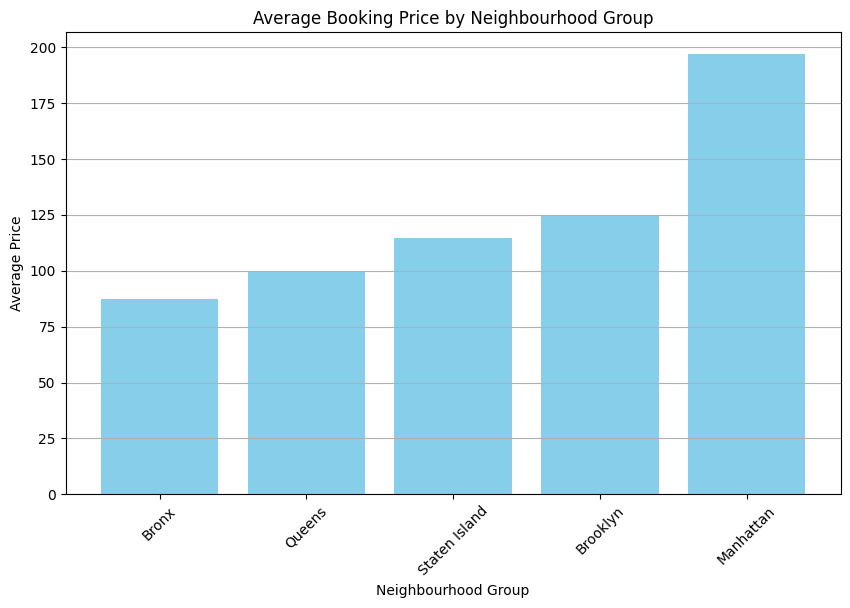

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(nyc_booking_neighbourhood.index, nyc_booking_neighbourhood["price"], color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Booking Price by Neighbourhood Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Distribution of properties by neighbourhood group

In [15]:
property_distribution = (
    nyc_listing_df_focus
    .groupby('neighbourhood_group')
    .size()  
    .reset_index(name='property_count')  
)

print(property_distribution)

  neighbourhood_group  property_count
0               Bronx            1091
1            Brooklyn           20104
2           Manhattan           21661
3              Queens            5666
4       Staten Island             373


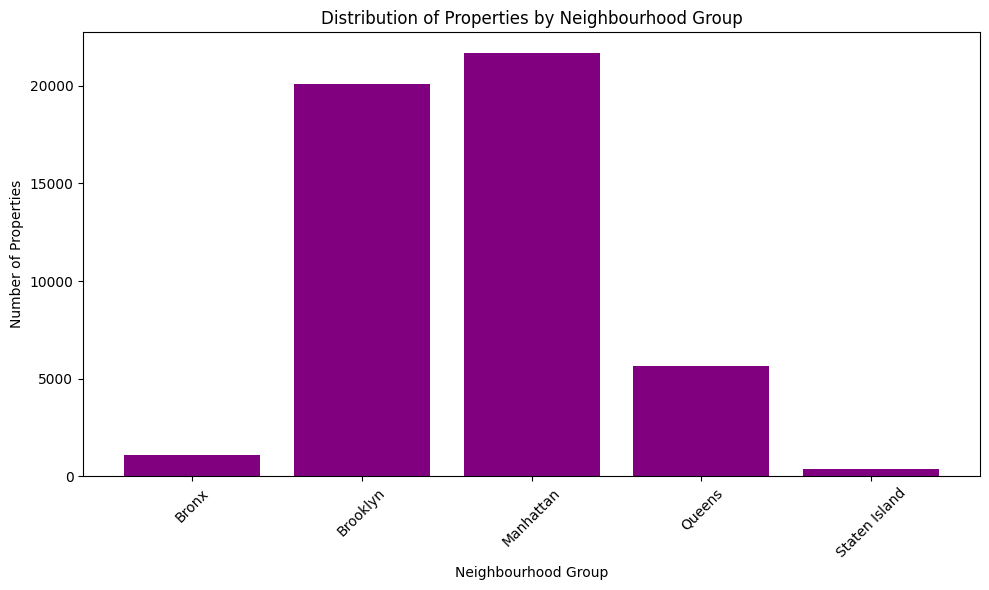

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(property_distribution['neighbourhood_group'], property_distribution['property_count'], color='purple')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Properties')
plt.title('Distribution of Properties by Neighbourhood Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The dataset shows varied property counts across NYC boroughs, with Brooklyn and Manhattan having the highest numbers, indicating robust housing availability in these areas.

The dataset reveals Bronx, Queens, and Staten Island with relatively lower average prices compared to Brooklyn and Manhattan, reflecting how neighborhood property counts may correlate with price affordability and demand trends in NYC.

In [17]:
nyc_booking_listing = (
    nyc_listing_df_focus
    .groupby("neighbourhood_group")
    .agg(
        mean_price=('price', 'mean'),
        total_listings=('calculated_host_listings_count', 'sum')
    )
    .sort_values(by="mean_price")
)

nyc_booking_listing.head()

,mean_price,total_listings
neighbourhood_group,,
Bronx,87.496792,2437
Queens,99.517649,23005
Staten Island,114.812332,865
Brooklyn,124.383207,45925
Manhattan,196.875814,277073


The data highlights significant price variations and listing densities across NYC. Manhattan stands out with the highest average prices and the largest number of listings.


In [18]:
occupancy_rates = (
    nyc_listing_df_focus
    .groupby('room_type')
    .agg(
        average_availability=('availability_365', 'mean'),
        total_listings=('room_type', 'count')
    )
    .sort_values(by='average_availability', ascending=False)
)

occupancy_rates

,average_availability,total_listings
room_type,,
Shared room,162.000862,1160
Entire home/apt,111.920304,25409
Private room,111.203933,22326


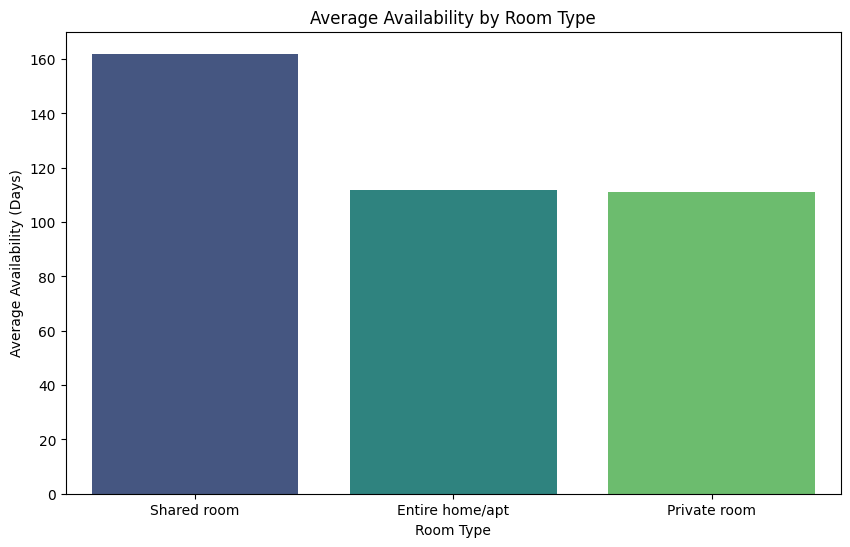

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=occupancy_rates.index, y='average_availability', data=occupancy_rates, palette='viridis')
plt.title('Average Availability by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Availability (Days)')
plt.show()

Shared rooms have the highest average availability, indicating they are less frequently booked, while entire homes/apartments and private rooms have lower availability, suggesting higher demand and more frequent bookings

In [20]:
summary = (
    nyc_listing_df_focus
    .groupby(['neighbourhood_group', 'room_type'])
    .agg({
        'price': 'mean',
        'availability_365': 'mean',
        'room_type': 'count'
    })
    .rename(columns={'room_type': 'total_listings'})
    .reset_index()
)

In [21]:
summary['occupancy_rate'] = (365 - summary['availability_365']) / 365

In [22]:
summary = summary.sort_values('occupancy_rate', ascending=False)
print(summary)

   neighbourhood_group        room_type       price  availability_365  \
14       Staten Island      Shared room   57.444444         64.777778   
3             Brooklyn  Entire home/apt  178.327545         97.205147   
4             Brooklyn     Private room   76.500099         99.917983   
7            Manhattan     Private room  116.776622        101.845026   
6            Manhattan  Entire home/apt  249.239109        117.140996   
9               Queens  Entire home/apt  147.050573        132.267176   
8            Manhattan      Shared room   88.977083        138.572917   
10              Queens     Private room   71.762456        149.222716   
2                Bronx      Shared room   59.800000        154.216667   
0                Bronx  Entire home/apt  127.506596        158.000000   
1                Bronx     Private room   66.788344        171.331288   
5             Brooklyn      Shared room   50.527845        178.007264   
12       Staten Island  Entire home/apt  173.846591

Manhattan's entire homes/apartments have the highest prices and relatively high occupancy rates, indicating strong demand. Brooklyn also shows high occupancy rates, especially for entire homes/apartments. Conversely, Staten Island and the Bronx have lower occupancy rates, particularly for shared rooms, suggesting less frequent bookings and lower demand.

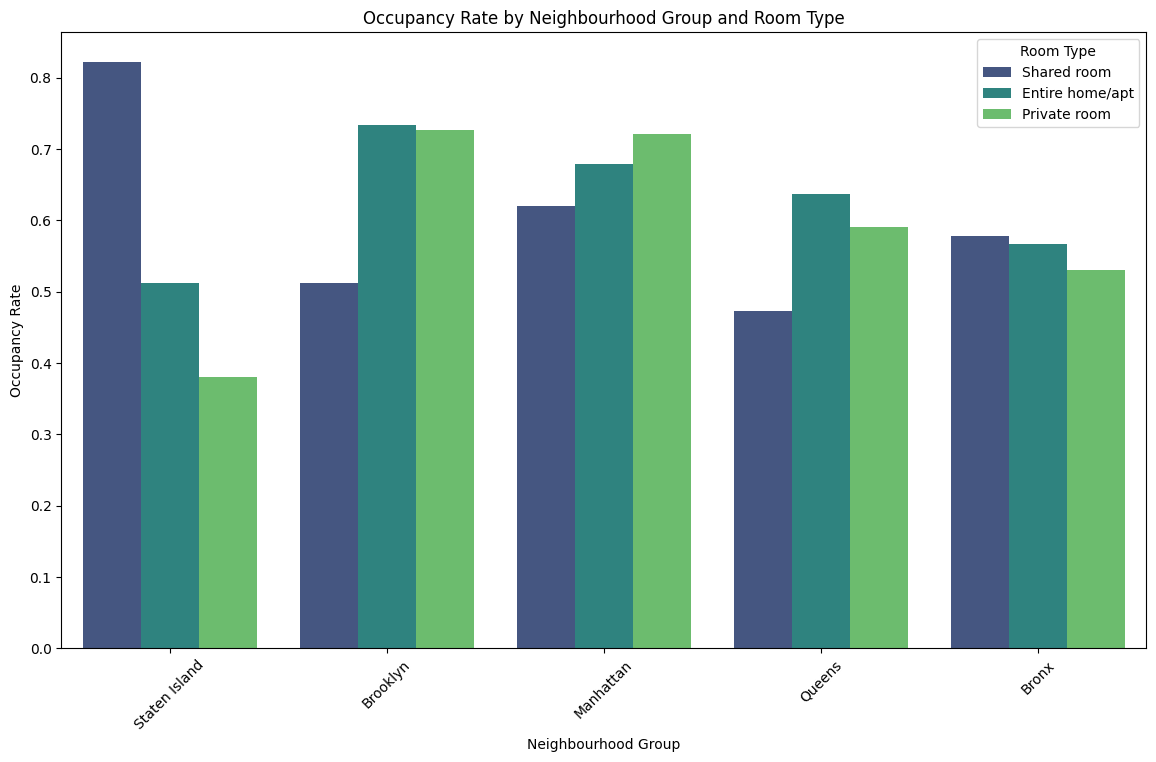

In [23]:
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood_group', y='occupancy_rate', hue='room_type', data=summary, palette='viridis')
plt.title('Occupancy Rate by Neighbourhood Group and Room Type')
plt.ylabel('Occupancy Rate')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

Shared rooms in Staten Island have the highest occupancy rate, indicating high demand for budget accommodations. In Brooklyn and Manhattan, entire homes/apartments and private rooms show balanced and relatively high occupancy rates, suggesting diverse lodging preferences. In contrast, Queens and the Bronx have lower occupancy rates for shared rooms, highlighting a preference for more private accommodations.

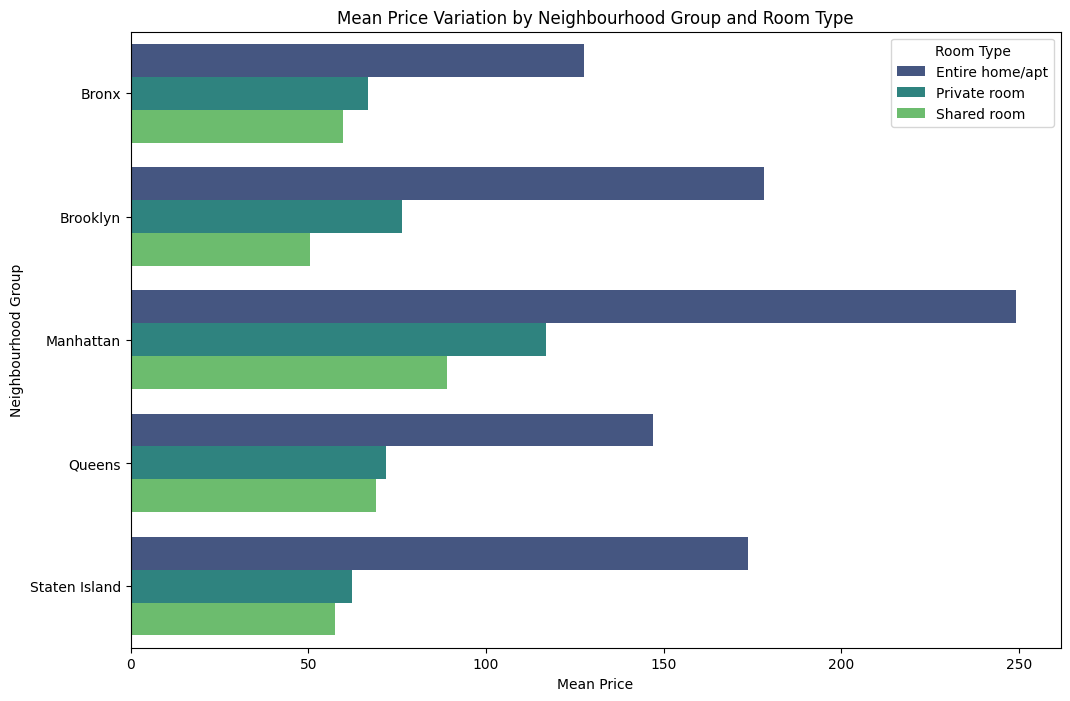

In [24]:
price_variation = (
     nyc_listing_df_focus
    .groupby(['neighbourhood_group', 'room_type'])
    .agg({'price': 'mean'})
    .reset_index()
)

plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='neighbourhood_group', hue='room_type', data=price_variation, palette='viridis')
plt.title('Mean Price Variation by Neighbourhood Group and Room Type')
plt.xlabel('Mean Price')
plt.ylabel('Neighbourhood Group')
plt.legend(title='Room Type')
plt.show()

The graph shows that Manhattan consistently has the highest prices across all room types, followed by Brooklyn. Entire homes/apartments are the most expensive option in every neighborhood group, while shared rooms are the least expensive.

There's a clear price hierarchy among neighborhoods, with the Bronx being the most affordable and significant price variations between room types, especially in Manhattan.

Text(0, 0.5, 'Count')

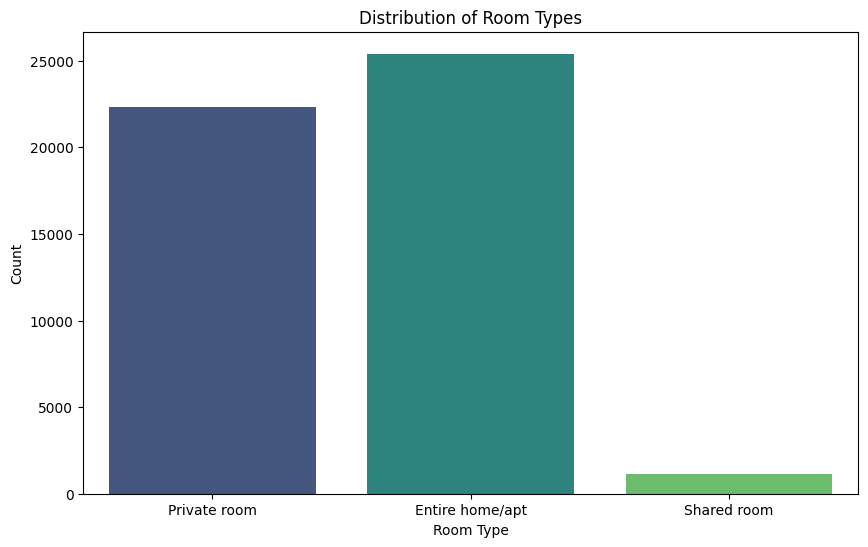

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=nyc_listing_df_focus, x='room_type', palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')

The NYC Airbnb market predominantly offers private accommodations. "Entire home/apt" listings lead with approximately 25,000 options, followed closely by "Private rooms" at over 20,000. These choices dominate the market, reflecting guests' preference for privacy and exclusivity. In contrast, "Shared rooms" are scarce, with only about 1,000 listings, indicating minimal demand for communal living spaces among travelers. This distribution highlights a clear trend towards more personal and self-contained rental experiences in the city.

<Figure size 1200x800 with 0 Axes>

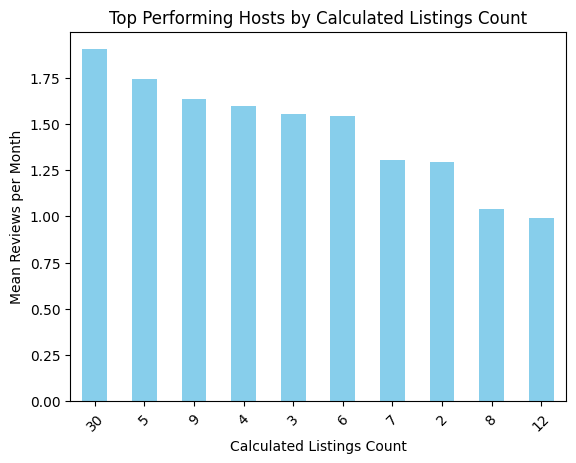

In [26]:
top_hosts = (
    nyc_listing_df_focus
    .groupby('calculated_host_listings_count')
    .agg({'reviews_per_month': 'mean', 'number_of_reviews': 'sum'})
    .sort_values(by='reviews_per_month', ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 8))
top_hosts.plot(kind='bar', y='reviews_per_month', color='skyblue', legend=False)
plt.title('Top Performing Hosts by Calculated Listings Count')
plt.xlabel('Calculated Listings Count')
plt.ylabel('Mean Reviews per Month')
plt.xticks(rotation=45)
plt.show()

The bar chart indicates that hosts with a higher number of calculated listings (e.g., 30) tend to receive more mean reviews per month. This suggests that larger hosts with more listings are likely to attract more guest feedback on average.

<Figure size 1000x600 with 0 Axes>

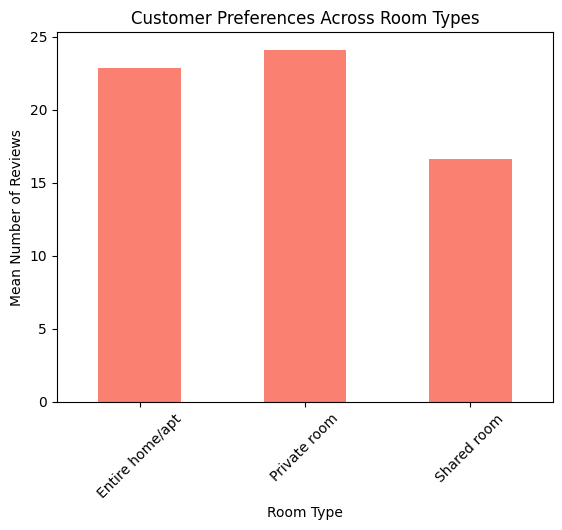

In [27]:
room_type_preferences = (
    nyc_listing_df_focus
    .groupby('room_type')
    .agg({'number_of_reviews': 'mean', 'availability_365': 'mean'})
)

plt.figure(figsize=(10, 6))
room_type_preferences.plot(kind='bar', y='number_of_reviews', color='salmon', legend=False)
plt.title('Customer Preferences Across Room Types')
plt.xlabel('Room Type')
plt.ylabel('Mean Number of Reviews')
plt.xticks(rotation=45)
plt.show()

The graph indicates that private rooms receive the highest mean number of reviews, suggesting they may be the most popular choice among guests. Entire homes/apartments follow closely behind in review count, while shared rooms have noticeably fewer reviews. This pattern implies that customers prefer more private accommodations, with a balance between the privacy of entire homes and the potentially lower cost of private rooms.

         room_type       price
0  Entire home/apt  211.794246
1     Private room   89.780973
2      Shared room   70.127586


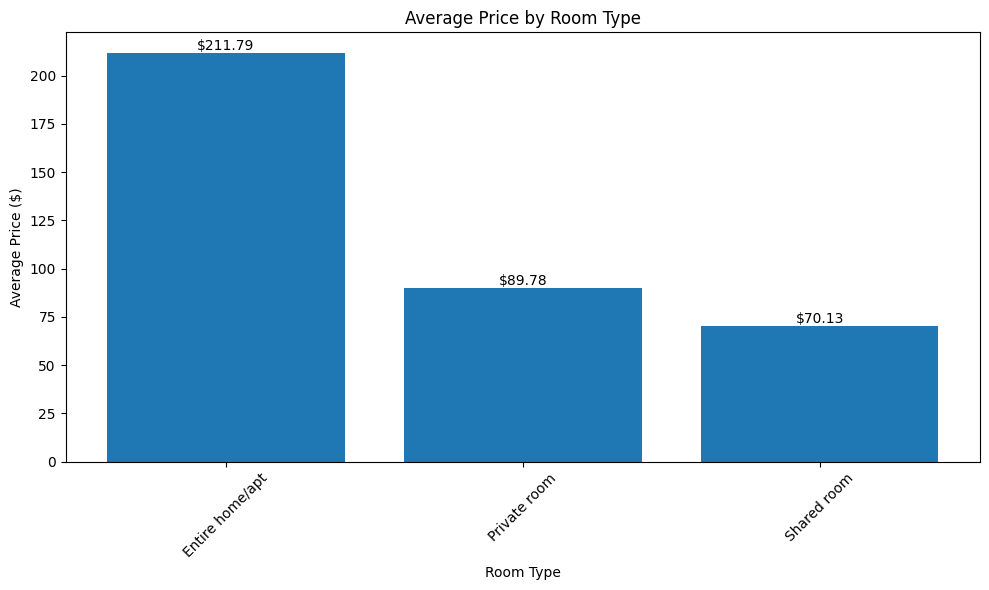

In [28]:
avg_price_by_room_type = (
    nyc_listing_df_focus
    .groupby('room_type')
    .agg({'price': 'mean'})
    .reset_index()
)
print(avg_price_by_room_type)

plt.figure(figsize=(10, 6))
plt.bar(avg_price_by_room_type['room_type'], avg_price_by_room_type['price'])
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

for i, v in enumerate(avg_price_by_room_type['price']):
    plt.text(i, v, f'${v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

The bar chart shows the average price by room type, with "Entire home/apt" being the most expensive at 211.79 Dollars, followed by "Private room" at 89.78 Dollars, and "Shared room" at 70.13 Dollars. This suggests that entire homes or apartments are priced significantly higher compared to private and shared rooms.

In [29]:
avg_min_nights = nyc_listing_df_focus.groupby('room_type')['minimum_nights'].mean().sort_values(ascending=False)
print("Average minimum nights stay by room type:")
print(avg_min_nights)

Average minimum nights stay by room type:
room_type
Entire home/apt    8.506907
Shared room        6.475000
Private room       5.377900
Name: minimum_nights, dtype: float64


The analysis indicates that hosts with more listings tend to receive more reviews per month. Additionally, entire homes/apts have the highest average price (211.79 Dollars) and the longest average minimum stay (8.51 nights), compared to private rooms (89.78 Dollars, 5.38 nights) and shared rooms (70.13 Dollars, 6.48 nights).

(0.0, 1000.0)

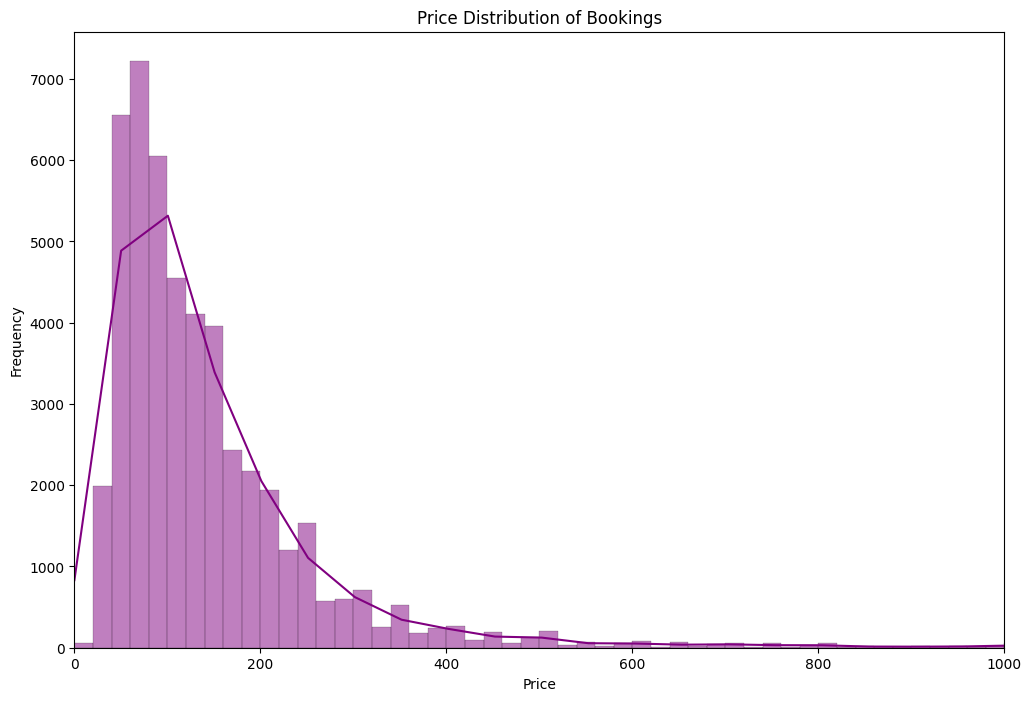

In [30]:
plt.figure(figsize=(12, 8))
sns.histplot(nyc_listing_df_focus['price'], bins=500, kde=True, color='purple')
plt.title('Price Distribution of Bookings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000)

The histogram shows the distribution of listing prices, with a peak around $50-$100. The frequency of listings decreases as the price increases, indicating that most listings are on the lower end of the price spectrum, with fewer high-priced listings.